# Resonancia Electrica

In [1]:
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns #Este paquete hace graficos mas lindos visualmente pero solo funciona con dataframes (por lo que tengo entendido)
sns.set() #Setea las figuras en el estilo del paquete seaborn (si, es solo por estetica y esta es la unica linea que uso del paquete)

from scipy.optimize import curve_fit

#### Defino la clase Medicion: me permite tener todos los valores y variables contenidas en un solo objeto para cada una de las mediciones

In [2]:
class Medicion(object):
    
    """
    La clase Medicion es util para cargar las distintas variables de cada una de las mediciones realizadas, con sus valores y unidades. 
    El valor de resistencia es la resistencia total, que incluye la resistencia R y la resistencia interna de la bobina.
    """
    
    def __init__(self, **kwargs):
        self.resistencia = np.NaN
        self.unidad_resistencia = np.NaN
        self.corriente = np.NaN
        self.unidad_corriente = np.NaN
        self.voltaje = np.NaN
        self.unidad_voltaje = np.NaN
        self.frecuencia = np.NaN
        self.unidad_frecuencia = np.NaN
        self.error_voltaje = np.NaN
        self.error_resistencia = np.NaN
        self.error_corriente = np.NaN
        self.omega0 = np.NaN
        self.omega0_error = np.NaN
        self.ajuste = np.NaN
        self.ajuste_error = np.NaN
        self.merito = np.NaN
        self.merito_error = np.NaN
        self.delta_omega = np.NaN
        self.delta_omega_error = np.NaN
        self.omega2 = np.NaN
        self.omega2_error = np.NaN
        self.omega1 = np.NaN
        self.omega1_error = np.NaN
        
    
    #funcion que me permite cargar los datos, se puede usar despues Medicion.cargar_resistencia(ponervalores)
    def cargar_resistencia(self, valores, unidad):
        
        self.resistencia = valores
        self.unidad_resistencia = unidad
        self.error_resistencia = 0.03*valores
        
    def cargar_voltaje(self, valores, unidad):
        
        self.voltaje = valores
        self.unidad_voltaje = unidad
        self.error_voltaje = 0.008*np.ones(len(valores))
        
    def cargar_frecuencia(self, valores, unidad):
      
        self.frecuencia = valores
        self.unidad_frecuencia = unidad    
    
    def cargar_corriente(self):
        
        self.corriente = self.voltaje/self.resistencia
        self.unidad_corriente = 'A'
        self.error_corriente = np.sqrt(((1/self.resistencia)*self.error_voltaje)**2 + ((self.voltaje/(self.resistencia)**2)*self.error_resistencia)**2)
        
        
    def gen_df(self):
        
        self.datos = pd.DataFrame({
                'voltaje': self.voltaje, 
                'corriente': self.corriente,
                'frecuencia': self.frecuencia})
        
    def cargar_ajuste(self, valores, error):
      
        self.ajuste = valores
        self.ajuste_error= error
    
    def cargar_omega0(self, valor, error):
    
        self.omega0 = valor
        self.omega0_error = error
        
    def cargar_Q(self, valor, error):
      
        self.merito = valor
        self.merito_error = error
        
    def cargar_deltaomega(self, valor, error):
        
        self.delta_omega = valor
        self.delta_omega_error = error
        
    def cargar_omega2(self, valor, error):
        
        self.omega2 = valor
        self.omega2_error = error
        
    def cargar_omega1(self, valor, error):
      
        self.omega1 = valor
        self.omega1_error = error

Cargo los datos

In [177]:
med1_res = Medicion()
med1_res.cargar_voltaje(np.array([0.082, 0.152, 0.216, 0.368, 0.560, 0.768, 1.05, 1.39, 1.68, 1.90, 2.22, 2.00, 2.72, 2.96, 3.12, 3.34, 3.52, 3.64, 3.72, 3.80, 3.76, 3.8, 3.8, 3.76, 3.68, 3.52, 3.32, 2.96, 3.12, 2.04, 2.44, 1.80, 1.58, 1.42, 1.28, 1.10, 0.936, 0.824, 0.672, 0.528, 0.464, 0.316]), 'V')
med1_res.cargar_resistencia(1000, 'ohm')
med1_res.cargar_frecuencia(np.array([10, 30, 50, 100, 150, 200, 250, 300, 325, 350, 375, 400, 410, 425, 435, 450, 465, 475, 485, 495, 503, 500, 510, 520, 530, 550, 570, 600, 585, 700, 650, 750, 800, 850, 900, 1000, 1100, 1200, 1400, 1750,2000, 3000]), 'Hz')
med1_res.cargar_corriente()

med2_res = Medicion()
med2_res.cargar_frecuencia(np.array([10, 30, 50, 100, 150, 200, 250, 300, 325, 350, 375, 400, 410, 425, 435, 450, 465, 475, 485, 495, 500, 503, 510, 520, 530, 550, 570, 600, 585, 700, 650, 750, 800, 850, 900, 1000, 1100]), 'Hz')
med2_res.cargar_resistencia(100, 'ohm')
med2_res.cargar_voltaje(np.array([0.034, 0.050, 0.062, 0.062, 0.075, 0.100, 0.128, 0.176, 0.192, 0.240, 0.280, 0.341, 0.384, 0.464, 0.504, 0.616, 0.752, 0.864, 0.984, 1.07, 1.11, 1.11, 1.11, 1.02, 0.912, 0.480, 0.260, 0.240, 0.280, 0.160, 0.180, 0.140, 0.100, 0.08, 0.076, 0.060, 0.052]), 'V')
med2_res.cargar_corriente()

med3_res = Medicion()
med3_res.cargar_voltaje(np.array([0.232, 0.560, 0.848, 1.62, 2.36, 3, 3.56, 4.04, 4.24, 4.40, 4.52, 4.60, 4.64, 4.68, 4.72, 4.76, 4.80, 4.80, 4.80, 4.8,  4.8, 4.8, 4.8, 4.76, 4.76, 4.76, 4.74, 4.68, 4.72, 4.48, 4.60, 4.36, 4.20, 4.02, 3.88, 3.60, 3.40, 3.16, 2.80, 2.32, 2.04, 1.44]), 'V')
med3_res.cargar_resistencia(5000, 'ohm')
med3_res.cargar_frecuencia(np.array([10, 30, 50, 100, 150, 200, 250, 300, 325, 350, 375, 400, 410, 425, 435, 450, 465, 475, 485, 495, 503, 500, 510, 520, 530, 550, 570, 600, 585, 700, 650, 750, 800, 850, 900, 1000, 1100, 1200, 1400, 1750, 2000, 3000]), 'Hz')
med3_res.cargar_corriente()

med4_anti = Medicion()
med4_anti.cargar_voltaje(np.array([3.44, 3.36, 3.20, 2.88, 2.68, 2.20, 2.00, 1.76, 1.56, 1.48, 1.44, 1.42, 1.44, 1.56, 1.76, 1.82, 2.46, 2.90, 3.24, 3.64, 3.96, 4.12, 4.28, 4.36, 4.48, 4.60, 4.64, 4.72]), 'V')
med4_anti.cargar_resistencia(1000, 'ohm')
med4_anti.cargar_frecuencia(np.array([20, 40, 60, 80, 90, 110, 120, 130, 140, 145, 150, 155, 160, 170, 180, 190, 210, 230, 250, 280, 310, 340, 375, 400, 450, 500, 550, 700]), 'Hz')
med4_anti.cargar_corriente()

med5_anti = Medicion()
med5_anti.cargar_voltaje(np.array([2.04, 2.04, 2.06, 2.12, 2.20, 2.24, 2.28, 2.36, 2.44, 2.48, 2.52, 2.60, 2.60, 2.68, 2.88, 3.00, 3.32, 3.60, 3.88, 4.16, 4.36, 4.44, 4.68, 4.72, 4.76]), 'V')
med5_anti.cargar_resistencia(1000, 'ohm')
med5_anti.cargar_frecuencia(np.array([20, 40, 60, 80, 100, 115, 125, 135, 140, 145, 150, 155, 160, 170, 180, 200, 230, 260, 300, 350, 400, 450, 600, 750, 1000]), 'Hz')
med5_anti.cargar_corriente()


### Ploteo para tener una idea de como son los datos: I vs frecuencia

<ErrorbarContainer object of 3 artists>

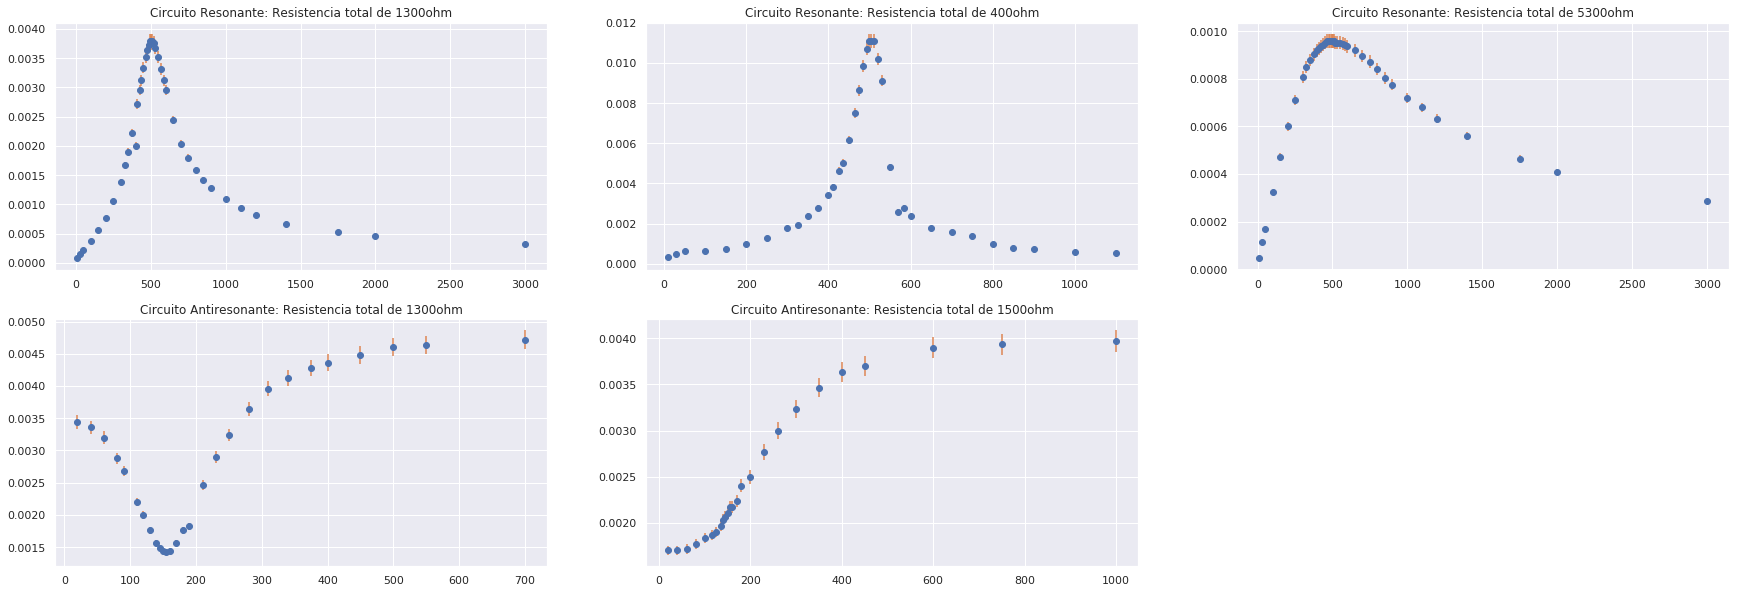

In [78]:
fig = plt.figure(figsize=(30, 10))

plt.subplot(2, 3, 1).set_title('Circuito Resonante: Resistencia total de '+ str(med1_res.resistencia + 300) + med1_res.unidad_resistencia)
plt.plot(med1_res.frecuencia, med1_res.corriente, 'o')
plt.errorbar(med1_res.frecuencia, med1_res.corriente, med1_res.error_corriente, ls='none')

plt.subplot(2, 3, 2).set_title('Circuito Resonante: Resistencia total de '+ str(med2_res.resistencia + 300) + med2_res.unidad_resistencia)
plt.plot(med2_res.frecuencia, med2_res.corriente, 'o')
plt.errorbar(med2_res.frecuencia, med2_res.corriente, med2_res.error_corriente, ls='none')

plt.subplot(2, 3, 3).set_title('Circuito Resonante: Resistencia total de '+ str(med3_res.resistencia + 300) + med3_res.unidad_resistencia)
plt.plot(med3_res.frecuencia, med3_res.corriente, 'o')
plt.errorbar(med3_res.frecuencia, med3_res.corriente, med3_res.error_corriente, ls='none')

plt.subplot(2, 3, 4).set_title('Circuito Antiresonante: Resistencia total de '+ str(med4_anti.resistencia + 300) + med4_anti.unidad_resistencia)
plt.plot(med4_anti.frecuencia, med4_anti.corriente, 'o')
plt.errorbar(med4_anti.frecuencia, med4_anti.corriente, med4_anti.error_corriente, ls='none')

plt.subplot(2, 3, 5).set_title('Circuito Antiresonante: Resistencia total de '+ str(med5_anti.resistencia + 300) + med5_anti.unidad_resistencia)
plt.plot(med5_anti.frecuencia, med5_anti.corriente, 'o')
plt.errorbar(med5_anti.frecuencia, med5_anti.corriente, med5_anti.error_corriente, ls='none')

# Circuito RLC serie (resonante)

## Ajuste teorico de la corriente

#### Defino la funcion (segun la guia) y genero un vector donde aplicar la funcion

In [149]:
def corriente_res (frec, R, C_mic, L):
  
  Vfuente = 5
  
  omega = frec*(2*np.pi)
  
  C = C_mic * 10**(-6)
  
  impedancia_total = np.sqrt((R**2) + (omega*L - 1/(omega*C))**2)
  
  I = np.abs(Vfuente)/impedancia_total
  
  return I

In [151]:
frec_teo = np.linspace(10,3000,50000)
corriente_teo = corriente_res(frec_teo, 1300, 0.1, 1)

## Funcion de $\omega_{0}$ (teorica, de la guia)

Ojo! el valor del capacitor se entra como microfaradios. Si tengo un capacitor de 0.1$\mu$F ingreso 0.1

In [152]:
def omega_0 (L,Cmicro):
  
  C = Cmicro * 10**(-6)
  
  omega = 1/np.sqrt(L*C)
  
  return omega

#### Formula de propagacion del error para $\omega_0$

In [153]:
def var_omega0 (L,Cmicro,varL,varCmicro, covmicro):
  
    var = (1/4)*(1/Cmicro)*(1/L**3)*varL + (1/4)*(1/L)*(1/Cmicro**3)*varCmicro + (1/2)*(1/(L*Cmicro)**2)*covmicro
    var *= 10**6
  
    return var

## Funcion $\Delta \omega$

In [154]:
def delta_omega (R,L):
  
  delta = R/L
  
  return(delta)

#### Función de propagación del error para $\Delta \omega$

In [155]:
def var_delta_omega (R, L, varR, varL, covRL):
  
  var = (1/(L**2))*varR + varL*(R**2)/(L**4) - (2*R*covRL)/(L**3)
  
  return(var)

## Funcion de $\omega_{1}$

In [156]:
def omega_1 (R, L, Cmicro):
  
  alpha = R/(2*L)
  C = Cmicro*10**(-6)
  omega_0 = 1/np.sqrt(L*C)
  
  omega = -1*alpha + np.sqrt((alpha**2)+(omega_0**2))
  
  return omega

#### Funcion de propagacion del error de $\omega_1$

In [157]:
def omega1_error (R, L, Cmicro, eR, eL, eCmicro):
  
  C = Cmicro * 10**(-6)
  eC = eCmicro * 10**(-12)
  
  aux = np.sqrt((1/(L*C)) + ((R/(2*L))**2))
  
  dwdr = (0.5/L)*(-1 + (R/(4*L))/aux)
  dwdl = (1/(2*L**2))*(R - (((R**2)/(2*L))+(1/C))/aux)
  dwdc = (-1/aux)*(1/(2*L*C**2))
  
  error = (dwdr**2)*(eR) + (dwdl**2)*(eL) + (dwdc**2)*(eC)
  
  return error

## Funcion de $\omega_2$

In [158]:
def omega_2 (R, L, Cmicro):
  
  alpha = R/(2*L)
  C = Cmicro*10**(-6)
  omega_0 = 1/np.sqrt(L*C)
  
  omega = alpha + np.sqrt((alpha**2) + (omega_0**2))
  
  return omega

#### Funcion de propagacion de error de $\omega_2$

In [159]:
def omega2_error (R, L, Cmicro, eR, eL, eCmicro):
  
  C = Cmicro * 10**(-6)
  eC = eCmicro * 10**(-12)
  
  aux = np.sqrt((1/(L*C)) + ((R/(2*L))**2))
  
  dwdr = (0.5/L)*(1 + (R/(4*L))/aux)
  dwdl = (-1/(2*L**2))*(R + (((R**2)/(2*L))+(1/C))/aux)
  dwdc = (-1/aux)*(1/(2*L*C**2))
  
  error = (dwdr**2)*(eR) + (dwdl**2)*(eL) + (dwdc**2)*(eC)
  
  return error

## Funcion del factor de merito (Q)

In [160]:
def merito (R,L, Cmicro):
  
  C = Cmicro*10**(-6)
  
  Q = (1/R)*np.sqrt(L/C)
  
  return Q

#### Funcion de propagacion de error de Q

In [161]:
def merito_error(R, L, Cmicro, eR, eL, eCmicro):
  
  C = Cmicro * 10**(-6)
  eC = eCmicro * 10**(-12)
  
  dqdr = np.sqrt(L/C)*(-1/(R**2))
  dqdl = 1/(2*R * np.sqrt(L*C))
  dqdc = -0.5*np.sqrt(L)/(R*(C**(3/2)))
  
  error = (dqdr**2)*(eR) + (dqdl**2)*(eL) + (dqdc**2)*(eC)
  
  return error

## Funcion de potencia disipada P($\omega$)

In [162]:
def P (frec,R, Cmicro, L):
  
  V = 5
  
  vef = V/np.sqrt(2)
  C = Cmicro*10**(-6)
  omega = 2*np.pi*frec
  
  p = R*(vef**2)/((R**2) + ((omega*L) - (1/(omega*C)))**2)
  
  return p

## Ajuste experimental a los datos con curve_fit, graficos, valor de $\omega_{0}$ y $\Delta \omega$

### Medicion 1

El ajuste propiamente dicho: toma la funcion corriente_res (corriente teorica definida en la guia), lo que va en el eje 'x', lo que va en el eje 'y', los parametros a ajustar p0=[1300,0.1,1] (ojo! recordar para cuando de el resultado que el capacitor es 0.1e-6), limites (bounds) para el ajuste y sigma para el error. Me devuelve un objeto de elementos que ajustan mejor, y una matriz de covarianza

In [92]:
params, var = curve_fit(corriente_res, med1_res.frecuencia, med1_res.corriente, p0 = [1300, 0.1, 1], bounds= ([1000, 0, 0], [2000, 1, 5]), sigma=med1_res.error_corriente)
med1_res.cargar_ajuste(params, var)
del params
del var

#### El resultado del ajuste

In [93]:
med1_res.ajuste # Los nuevos valores de R, L y C que ajustan a los datos

array([1.34383894e+03, 1.05205451e-01, 9.33708499e-01])

In [94]:
med1_res.ajuste_error # La diagonal es el error de R, C y L respectivamente

array([[ 6.72806376e+02,  1.67673582e-02, -1.16274347e-01],
       [ 1.67673582e-02,  4.21769450e-06, -2.64284711e-05],
       [-1.16274347e-01, -2.64284711e-05,  2.91736683e-04]])

#### $\omega_0$ y el error asociado

In [95]:
med1_res.cargar_omega0(omega_0(med1_res.ajuste[2], med1_res.ajuste[1]), np.sqrt(var_omega0(med1_res.ajuste[2], med1_res.ajuste[1], med1_res.ajuste_error[2,2], med1_res.ajuste_error[1,1], med1_res.ajuste_error[2,1])))

print('Omega0 = ' + str(med1_res.omega0) + ' +/- ' + str(med1_res.omega0_error))

Omega0 = 3190.621029762483 +/- 21.260790097268348


#### $\Delta \omega$ y error

In [96]:
med1_res.cargar_deltaomega(delta_omega(med1_res.ajuste[0], med1_res.ajuste[2]), np.sqrt(var_delta_omega(med1_res.ajuste[0], med1_res.ajuste[2], med1_res.ajuste_error[0,0], med1_res.ajuste_error[2,2], med1_res.ajuste_error[2,0])))

print('deltaOmega = ' + str(med1_res.delta_omega) + ' +/- ' + str(med1_res.delta_omega_error))

deltaOmega = 1439.2489054736286 +/- 42.997819633538164


#### $\omega_1$ y error

In [97]:
med1_res.cargar_omega1(omega_1(med1_res.ajuste[0], med1_res.ajuste[2], med1_res.ajuste[1]), 
                       np.sqrt(omega1_error(med1_res.ajuste[0], med1_res.ajuste[2], med1_res.ajuste[1], med1_res.ajuste_error[0,0], med1_res.ajuste_error[2,2], med1_res.ajuste_error[1,1])))

print('Omega_1 = ' + str(med1_res.omega1) + ' +/- ' + str(med1_res.omega1_error))

Omega_1 = 2551.143333049784 +/- 37.509106855734665


#### $\omega_2$ y error

In [98]:
med1_res.cargar_omega2(omega_2(med1_res.ajuste[0], med1_res.ajuste[2], med1_res.ajuste[1]), 
                       np.sqrt(omega2_error(med1_res.ajuste[0], med1_res.ajuste[2], med1_res.ajuste[1], med1_res.ajuste_error[0,0], med1_res.ajuste_error[2,2], med1_res.ajuste_error[1,1])))

print('Omega_2 = ' + str(med1_res.omega2) + ' +/- ' + str(med1_res.omega2_error))

Omega_2 = 3990.3922385234127 +/- 56.065600150776675


#### Q y error

In [99]:
med1_res.cargar_Q(merito(med1_res.ajuste[0], med1_res.ajuste[2], med1_res.ajuste[1]), 
                       np.sqrt(merito_error(med1_res.ajuste[0], med1_res.ajuste[2], med1_res.ajuste[1], med1_res.ajuste_error[0,0], med1_res.ajuste_error[2,2], med1_res.ajuste_error[1,1])))

print('Q = ' + str(med1_res.merito) + ' +/- ' + str(med1_res.merito_error))

Q = 2.216865350828606 +/- 0.05206018611020595


Grafico de ajuste, datos y teorico

/home/mech/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


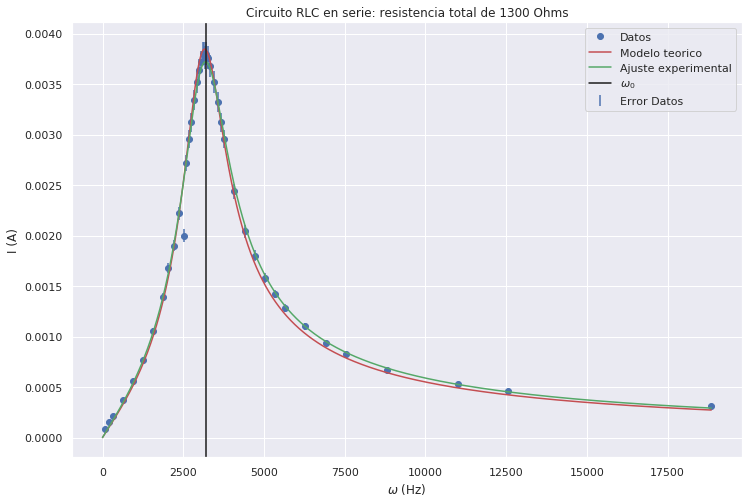

In [100]:
plt.figure(figsize=(12,8))
plt.plot(2*np.pi*med1_res.frecuencia, med1_res.corriente, 'o', color = 'b', label='Datos')
plt.errorbar(2*np.pi*med1_res.frecuencia, med1_res.corriente, med1_res.error_corriente, ls='none', label='Error Datos')
plt.plot(2*np.pi*frec_teo, corriente_teo, color = 'r', label='Modelo teorico')
plt.plot(2*np.pi*frec_teo, corriente_res(frec_teo, *med1_res.ajuste), color = 'g', label='Ajuste experimental')
plt.title('Circuito RLC en serie: resistencia total de 1300 Ohms')
plt.ylabel('I (A)')
plt.xlabel('$\omega$ (Hz)')
plt.axvline(x=med1_res.omega0, color='k', label = '$\omega_{0}$')
plt.legend()

### Medicion 2

In [101]:
params, var = curve_fit(corriente_res, med2_res.frecuencia, med2_res.corriente, p0 = [100, 0.1, 1], bounds= ([100, 0, 0], [2000, 10, 5]), sigma=med2_res.error_corriente)
med2_res.cargar_ajuste(params, var)
del params
del var

In [102]:
med2_res.ajuste

array([4.45685628e+02, 8.17727616e-02, 1.28731554e+00])

In [103]:
med2_res.ajuste_error

array([[ 9.06888380e+02,  3.94161988e-02, -6.31912045e-01],
       [ 3.94161988e-02,  1.87500827e-05, -2.85860392e-04],
       [-6.31912045e-01, -2.85860392e-04,  4.56752489e-03]])

In [104]:
med2_res.cargar_omega0(omega_0(med2_res.ajuste[2], med2_res.ajuste[1]), np.sqrt(var_omega0(med2_res.ajuste[2], med2_res.ajuste[1], med2_res.ajuste_error[2,2], med2_res.ajuste_error[1,1], med2_res.ajuste_error[2,1])))

print('Omega0 = ' + str(med2_res.omega0) + ' +/- ' + str(med2_res.omega0_error))

med2_res.cargar_deltaomega(delta_omega(med2_res.ajuste[0], med2_res.ajuste[2]), np.sqrt(var_delta_omega(med2_res.ajuste[0], med2_res.ajuste[2], med2_res.ajuste_error[0,0], med2_res.ajuste_error[2,2], med2_res.ajuste_error[2,0])))

print('deltaOmega = ' + str(med2_res.delta_omega) + ' +/- ' + str(med2_res.delta_omega_error))

med2_res.cargar_omega1(omega_1(med2_res.ajuste[0], med2_res.ajuste[2], med2_res.ajuste[1]), 
                       np.sqrt(omega1_error(med2_res.ajuste[0], med2_res.ajuste[2], med2_res.ajuste[1], 3, 2*10**(-3), 2*10**(-10))))

print('Omega_1 = ' + str(med2_res.omega1) + ' +/- ' + str(med2_res.omega1_error))

med2_res.cargar_omega2(omega_2(med2_res.ajuste[0], med2_res.ajuste[2], med2_res.ajuste[1]), 
                       np.sqrt(omega2_error(med2_res.ajuste[0], med2_res.ajuste[2], med2_res.ajuste[1], 3, 2*10**(-3), 2*10**(-10))))

print('Omega_2 = ' + str(med2_res.omega2) + ' +/- ' + str(med2_res.omega2_error))

med2_res.cargar_Q(merito(med2_res.ajuste[0], med2_res.ajuste[2], med2_res.ajuste[1]), 
                       np.sqrt(merito_error(med2_res.ajuste[0], med2_res.ajuste[2], med2_res.ajuste[1], 3, 2*10**(-3), 2*10**(-10))))

print('Q = ' + str(med2_res.merito) + ' +/- ' + str(med2_res.merito_error))


Omega0 = 3082.1456735474867 +/- 17.511391094672277
deltaOmega = 346.21319583716013 +/- 33.788309710099846
Omega_1 = 2913.896454754098 +/- 47.78136650248686
Omega_2 = 3260.1096505912583 +/- 59.808193190237176
Q = 8.902450023878238 +/- 0.15846051993843321


/home/mech/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


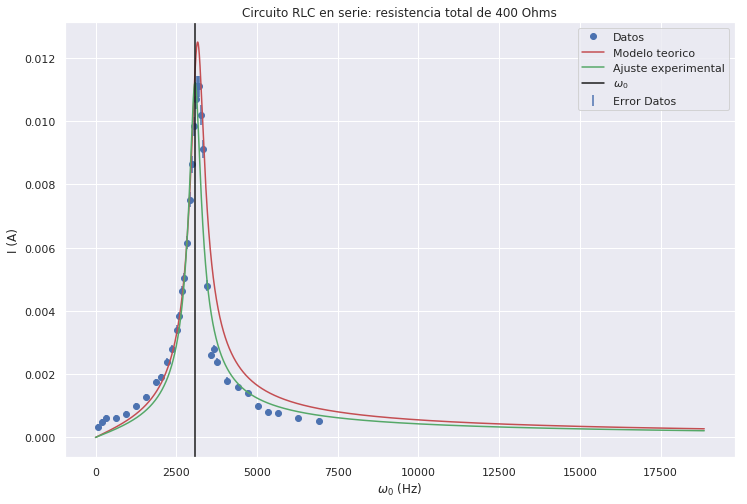

In [105]:
plt.figure(figsize=(12,8))
plt.plot(2*np.pi*med2_res.frecuencia, med2_res.corriente, 'o', color = 'b', label='Datos')
plt.errorbar(2*np.pi*med2_res.frecuencia, med2_res.corriente, med2_res.error_corriente, ls='none', label='Error Datos')
plt.plot(2*np.pi*frec_teo, corriente_res(frec_teo, 400, 0.1, 1), color = 'r', label='Modelo teorico')
plt.plot(2*np.pi*frec_teo, corriente_res(frec_teo, *med2_res.ajuste), color = 'g', label='Ajuste experimental')
plt.title('Circuito RLC en serie: resistencia total de 400 Ohms')
plt.ylabel('I (A)')
plt.xlabel('$\omega_{0}$ (Hz)')
plt.axvline(x=med2_res.omega0, color='k', label = '$\omega_{0}$')
plt.legend()

### Medicion 3

In [106]:
params, var = curve_fit(corriente_res, med3_res.frecuencia, med3_res.corriente, p0 = [5300, 0.1, 1], bounds= ([100, 0, 0], [7000, 10, 4]), sigma=med3_res.error_corriente)

med3_res.cargar_ajuste(params, var)
del params
del var

In [107]:
med3_res.ajuste

array([5.25256992e+03, 1.10206864e-01, 9.26038524e-01])

In [108]:
med3_res.ajuste_error

array([[ 1.24926936e+03,  1.19468088e-02, -1.43291428e-01],
       [ 1.19468088e-02,  2.91772300e-06, -7.30960682e-06],
       [-1.43291428e-01, -7.30960682e-06,  2.14552842e-04]])

In [109]:
med3_res.cargar_omega0(omega_0(med3_res.ajuste[2], med3_res.ajuste[1]), np.sqrt(var_omega0(med3_res.ajuste[2], med3_res.ajuste[1], med3_res.ajuste_error[2,2], med3_res.ajuste_error[1,1], med3_res.ajuste_error[2,1])))

print('Omega0 = ' + str(med3_res.omega0) + ' +/- ' + str(med3_res.omega0_error))

med3_res.cargar_deltaomega(delta_omega(med3_res.ajuste[0], med3_res.ajuste[2]), np.sqrt(var_delta_omega(med3_res.ajuste[0], med3_res.ajuste[2], med3_res.ajuste_error[0,0], med3_res.ajuste_error[2,2], med3_res.ajuste_error[2,0])))

print('deltaOmega = ' + str(med3_res.delta_omega) + ' +/- ' + str(med3_res.delta_omega_error))

med3_res.cargar_omega1(omega_1(med3_res.ajuste[0], med3_res.ajuste[2], med3_res.ajuste[1]), 
                       np.sqrt(omega1_error(med3_res.ajuste[0], med3_res.ajuste[2], med3_res.ajuste[1], 150, 2*10**(-3), 2*10**(-10))))

print('Omega_1 = ' + str(med3_res.omega1) + ' +/- ' + str(med3_res.omega1_error))

med3_res.cargar_omega2(omega_2(med3_res.ajuste[0], med3_res.ajuste[2], med3_res.ajuste[1]), 
                       np.sqrt(omega2_error(med3_res.ajuste[0], med3_res.ajuste[2], med3_res.ajuste[1], 150, 2*10**(-3), 2*10**(-10))))

print('Omega_2 = ' + str(med3_res.omega2) + ' +/- ' + str(med3_res.omega2_error))

med3_res.cargar_Q(merito(med3_res.ajuste[0], med3_res.ajuste[2], med3_res.ajuste[1]), 
                       np.sqrt(merito_error(med3_res.ajuste[0], med3_res.ajuste[2], med3_res.ajuste[1], 150, 2*10**(-3), 2*10**(-10))))

print('Q = ' + str(med3_res.merito) + ' +/- ' + str(med3_res.merito_error))


Omega0 = 3130.2653291119523 +/- 29.162586719993993
deltaOmega = 5672.085751788017 +/- 106.77878574552605
Omega_1 = 1387.900805613774 +/- 11.856508498745828
Omega_2 = 7059.986557401791 +/- 285.0717662655465
Q = 0.5518720037201827 +/- 0.01338786376710421


/home/mech/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


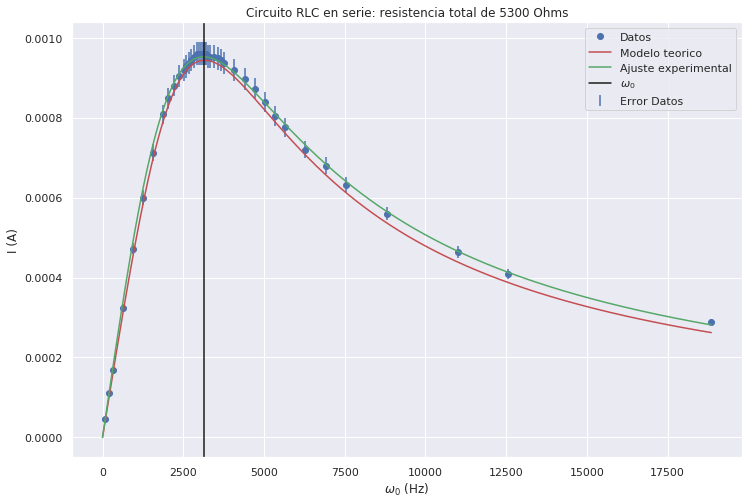

In [110]:
plt.figure(figsize=(12,8))
plt.plot(2*np.pi*med3_res.frecuencia, med3_res.corriente, 'o', color = 'b', label='Datos')
plt.errorbar(2*np.pi*med3_res.frecuencia, med3_res.corriente, med3_res.error_corriente, ls='none', label='Error Datos')
plt.plot(2*np.pi*frec_teo, corriente_res(frec_teo, 5300, 0.1, 1), color = 'r', label='Modelo teorico')
plt.plot(2*np.pi*frec_teo, corriente_res(frec_teo, *med3_res.ajuste), color = 'g', label='Ajuste experimental')
plt.title('Circuito RLC en serie: resistencia total de 5300 Ohms')
plt.ylabel('I (A)')
plt.xlabel('$\omega_{0}$ (Hz)')
plt.axvline(x=med3_res.omega0, color='k', label = '$\omega_{0}$')
plt.legend()

### Comparacion de los 3 circuitos resonantes

/home/mech/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


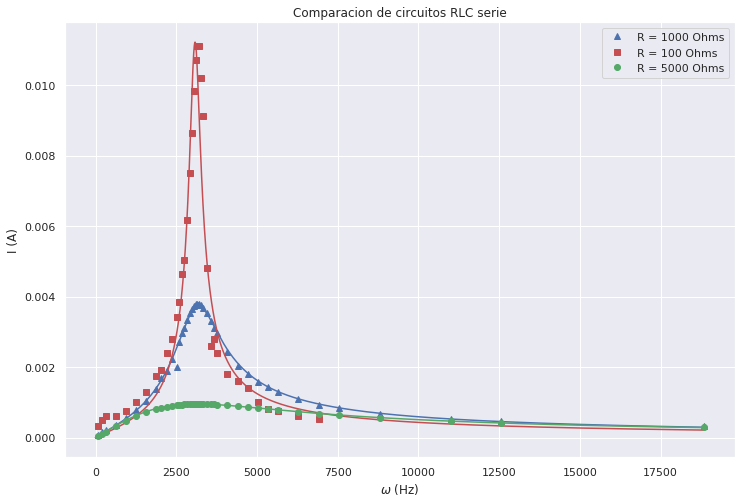

In [111]:
plt.figure(figsize=(12,8))
plt.plot(2*np.pi*med1_res.frecuencia, med1_res.corriente, '^', color = 'b', label='R = 1000 Ohms')
#plt.errorbar(med1_res.frecuencia, med1_res.corriente, med1_res.error_corriente, ls='none')
plt.plot(2*np.pi*frec_teo, corriente_res(frec_teo, *med1_res.ajuste), color = 'b')
#plt.plot(frec_teo, corriente_res(frec_teo, 1300,0.1,1), color = 'b')
plt.plot(2*np.pi*med2_res.frecuencia, med2_res.corriente, 's', color = 'r', label='R = 100 Ohms')
#plt.errorbar(med2_res.frecuencia, med2_res.corriente, med2_res.error_corriente, ls='none')
plt.plot(2*np.pi*frec_teo, corriente_res(frec_teo, *med2_res.ajuste), color = 'r')
#plt.plot(frec_teo, corriente_res(frec_teo, 400,0.1,1), color = 'r')
plt.plot(2*np.pi*med3_res.frecuencia, med3_res.corriente, 'o', color = 'g', label='R = 5000 Ohms')
#plt.errorbar(med3_res.frecuencia, med3_res.corriente, med3_res.error_corriente, ls='none')
plt.plot(2*np.pi*frec_teo, corriente_res(frec_teo, *med3_res.ajuste), color = 'g')
#plt.plot(frec_teo, corriente_res(frec_teo, 5300,0.1,1), color = 'g')
plt.title('Comparacion de circuitos RLC serie')
plt.ylabel('I (A)')
plt.xlabel('$\omega$ (Hz)')
plt.legend()

/home/mech/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


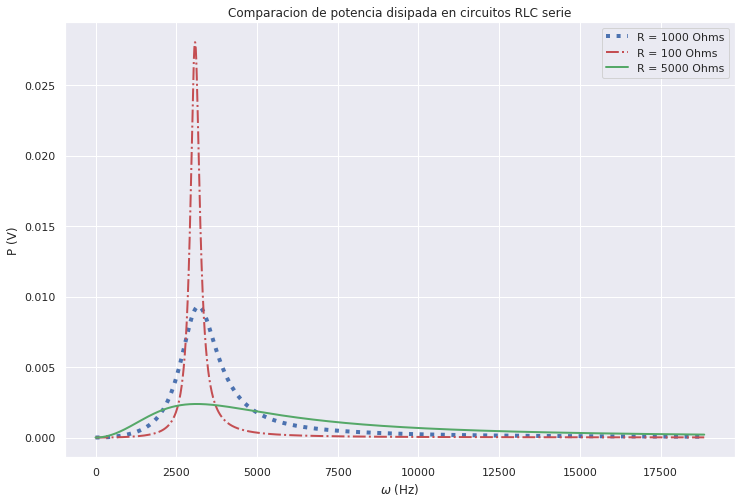

In [112]:
plt.figure(figsize=(12,8))
#plt.plot(2*np.pi*med1_res.frecuencia, med1_res.corriente, '^', color = 'b', label='R = 1000 Ohms')
#plt.errorbar(med1_res.frecuencia, med1_res.corriente, med1_res.error_corriente, ls='none')
plt.plot(2*np.pi*frec_teo, P(frec_teo, *med1_res.ajuste),color = 'b', lw =4, label='R = 1000 Ohms', linestyle = ":")
#plt.plot(frec_teo, corriente_res(frec_teo, 1300,0.1,1), color = 'b')
#plt.plot(2*np.pi*med2_res.frecuencia, med2_res.corriente, 's', color = 'r', label='R = 100 Ohms')
#plt.errorbar(med2_res.frecuencia, med2_res.corriente, med2_res.error_corriente, ls='none')
plt.plot(2*np.pi*frec_teo, P(frec_teo, *med2_res.ajuste), color = 'r', lw=2, label='R = 100 Ohms', linestyle = '-.')
#plt.plot(frec_teo, corriente_res(frec_teo, 400,0.1,1), color = 'r')
#plt.plot(2*np.pi*med3_res.frecuencia, med3_res.corriente, 'o', color = 'g', label='R = 5000 Ohms')
#plt.errorbar(med3_res.frecuencia, med3_res.corriente, med3_res.error_corriente, ls='none')
plt.plot(2*np.pi*frec_teo, P(frec_teo, *med3_res.ajuste), color = 'g', lw=2, label='R = 5000 Ohms')
#plt.plot(frec_teo, corriente_res(frec_teo, 5300,0.1,1), color = 'g')
plt.title('Comparacion de potencia disipada en circuitos RLC serie')
plt.ylabel('P (V)')
plt.xlabel('$\omega$ (Hz)')
plt.legend()

# Circuito RLC paralelo (antiresonante)

## Funcion de la corriente

In [144]:
def corriente_anti(frec, R, C_mic, L, Rlim, V):
    
    omega = frec*(2*np.pi)
  
    C = C_mic * 10**(-6)
    
    arr = (L/C) - (1j/(omega*C))*R
    
    abj = R + ((omega*L) - (1/(omega*C)))*1j
    
    impedancia_tot = abs(Rlim + (arr/abj))
    
    return (V/impedancia_tot)

### Medicion 4

In [145]:
params, var = curve_fit(corriente_anti, med4_anti.frecuencia, med4_anti.corriente, p0 = [400, 1, 1, 1000, 5], sigma=med4_anti.error_corriente)
med4_anti.cargar_ajuste(params, var)
del params
del var
med4_anti.ajuste

array([3.55132727e+02, 1.15854408e+00, 8.53599848e-01, 9.16422539e+02,
       4.44373356e+00])

In [176]:
np.sqrt(np.diag(med4_anti.ajuste_error))

array([1.04279372e+08, 3.40324920e+05, 2.50646498e+05, 2.69093273e+08,
       1.30483385e+06])

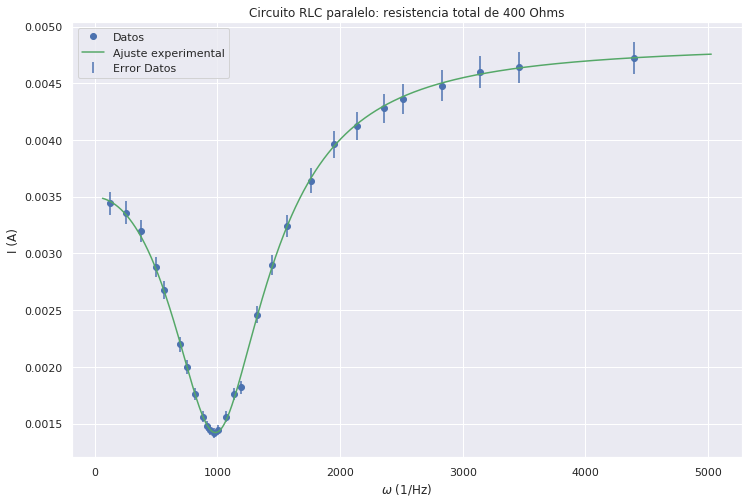

In [146]:
plt.figure(figsize=(12,8))
plt.plot(2*np.pi*med4_anti.frecuencia, med4_anti.corriente, 'o', color = 'b', label='Datos')
plt.errorbar(2*np.pi*med4_anti.frecuencia, med4_anti.corriente, med4_anti.error_corriente, ls='none', label='Error Datos')
plt.plot(2*np.pi*np.linspace(10, 800, 50000), corriente_anti(np.linspace(10, 800, 50000), *med4_anti.ajuste), color = 'g', label='Ajuste experimental')
plt.title('Circuito RLC paralelo: resistencia total de 400 Ohms')
plt.ylabel('I (A)')
plt.xlabel('$\omega$ (1/Hz)')
plt.legend()

### Medicion 5

In [187]:
params, var = curve_fit(corriente_anti, med5_anti.frecuencia[8:med5_anti.frecuencia.shape[0]], med5_anti.corriente[8:med5_anti.frecuencia.shape[0]], p0 = [1200, 1, 1, 1000, 5], bounds = ([1000,0.8, 0.8,900,4],[1700,1.2,1.2,1200,7]), sigma=med5_anti.error_corriente[8:med5_anti.frecuencia.shape[0]])
med5_anti.cargar_ajuste(params, var)
del params
del var
med5_anti.ajuste

array([1.42965094e+03, 1.04256434e+00, 9.08131552e-01, 1.03792604e+03,
       5.02172487e+00])

In [185]:
med5_anti.frecuencia.shape

(25,)

In [188]:
np.sqrt(np.diag(med5_anti.ajuste_error))

array([1.75992578e+08, 1.28341551e+05, 1.11792630e+05, 1.27770587e+08,
       6.18183465e+05])

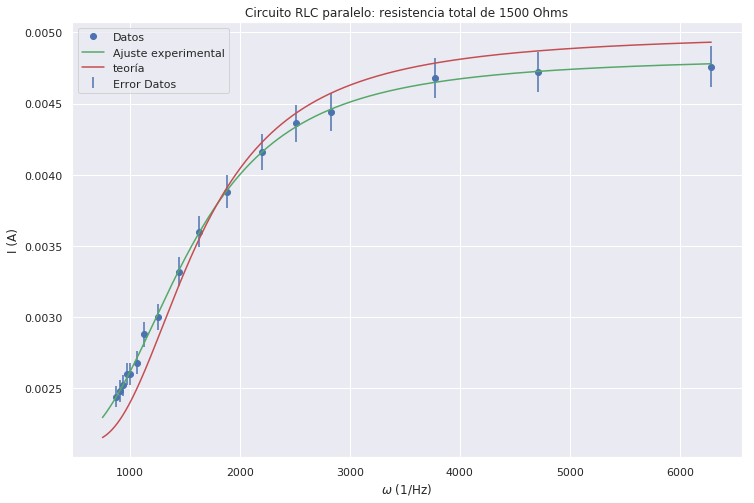

In [194]:
plt.figure(figsize=(12,8))
plt.plot(2*np.pi*med5_anti.frecuencia[8:med5_anti.frecuencia.shape[0]], med5_anti.corriente[8:med5_anti.frecuencia.shape[0]], 'o', color = 'b', label='Datos')
plt.errorbar(2*np.pi*med5_anti.frecuencia[8:med5_anti.frecuencia.shape[0]], med5_anti.corriente[8:med5_anti.frecuencia.shape[0]], med5_anti.error_corriente[8:med5_anti.frecuencia.shape[0]], ls='none', label='Error Datos')
plt.plot(2*np.pi*np.linspace(120, 1000, 50000), corriente_anti(np.linspace(120, 1000, 50000), *med5_anti.ajuste), color = 'g', label='Ajuste experimental')
plt.plot(2*np.pi*np.linspace(120, 1000, 50000), corriente_anti(np.linspace(120, 1000, 50000), 1200,1,1,1000,5), color = 'r', label='teoría')
plt.title('Circuito RLC paralelo: resistencia total de 1500 Ohms')
plt.ylabel('I (A)')
plt.xlabel('$\omega$ (1/Hz)')
plt.legend(loc='upper left')